# David Williams

# Project 4 Decision Tree Data 201

The data come from the Kaggle websit and shows 13 factors that contrubute to heart disease.

Context
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.


# Content

Attribute Information:
> 1. age
> 2. sex
> 3. chest pain type (4 values)
> 4. resting blood pressure
> 5. serum cholestoral in mg/dl
> 6. fasting blood sugar > 120 mg/dl
> 7. resting electrocardiographic results (values 0,1,2)
> 8. maximum heart rate achieved
> 9. exercise induced angina
> 10. oldpeak = ST depression induced by exercise relative to rest
> 11. the slope of the peak exercise ST segment
> 12. number of major vessels (0-3) colored by flourosopy
> 13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

The 14th variable is the target and 1 if heart disease and 0 if no heart disease

In [22]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [23]:
import pandas as pd
import scipy.stats
from scipy import stats 

In [24]:
import numpy as np

In [25]:
heart_disease=pd.read_csv('C:/Users/dwilliams/Documents/montgomery/data 201/heart.csv')

In [26]:
heart_disease.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [27]:
heart_disease.shape

(1212, 14)

In [28]:
# separate the independent variables and dependent variables
# The independent variables are: Resting blood pressure, serum cholestoral 
# The dependent variable is: target heart disease

#Using blood pressure and cholestoral to predict heart disease

X = heart_disease.iloc[:, [3,4]].values
y = heart_disease.iloc[:,13].values


In [29]:
import sklearn as scikit_learn

In [30]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split

In [31]:
# Splitting the dataset into the Training set and Test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [32]:
X_train.shape,y_train.shape

((969, 2), (969,))

In [33]:
X_test.shape,y_test.shape

((243, 2), (243,))

In [34]:
# Feature Scaling
# Feature Scaling was used because of the different values of independent variables
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [35]:
X_train

array([[ 0.36598997,  0.9303303 ],
       [-0.67182453, -0.11988141],
       [-0.38354273, -0.02263958],
       ...,
       [-0.38354273,  1.22205578],
       [-0.21057365,  0.24963753],
       [-0.21057365, -0.80057419]])

In [36]:
X_test

array([[-6.71824534e-01,  4.05224448e-01],
       [ 9.42553578e-01, -4.20879479e-02],
       [ 1.35364522e-01, -8.78367645e-01],
       [-2.10573645e-01, -7.42229090e-01],
       [-9.52609228e-02, -2.23975320e+00],
       [ 8.27240855e-01,  6.19156464e-01],
       [-7.87137256e-01,  5.99708099e-01],
       [ 2.50677244e-01, -9.75609471e-01],
       [ 4.81302689e-01, -1.34512841e+00],
       [ 1.05786630e+00, -6.15363130e-02],
       [-5.56511812e-01,  7.74743384e-01],
       [-1.24838815e+00, -6.83883995e-01],
       [ 1.05786630e+00,  2.30189163e-01],
       [ 4.81302689e-01, -1.05340293e+00],
       [-1.13307542e+00,  4.24672813e-01],
       [ 1.35364522e-01,  4.83017909e-01],
       [-9.52609228e-02,  7.16398289e-01],
       [-6.71824534e-01,  4.44121178e-01],
       [ 1.92271172e+00,  8.33088480e-01],
       [-7.87137256e-01, -7.03332360e-01],
       [-6.71824534e-01,  3.27430988e-01],
       [ 2.50677244e-01,  1.33874597e+00],
       [ 1.92271172e+00,  8.33088480e-01],
       [ 1.

In [37]:
#fit Decision Tree to training set
from sklearn.tree import DecisionTreeClassifier

In [49]:
classifier = DecisionTreeClassifier()

In [50]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [51]:
y_pred = classifier.predict(X_test)

In [52]:
y_pred

array([0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0], dtype=int64)

In [53]:
# confusion matrix
from sklearn.metrics import confusion_matrix

In [54]:
confusion_mx = confusion_matrix(y_test,y_pred)

In [55]:
confusion_mx

array([[ 97,   5],
       [  4, 137]], dtype=int64)

True  positive  97
False positive  5
False negative  4
True  negative  137

The are 234 correct predictions and 9 incorrect predictions

In [56]:
classifier.score(X_test,y_test)

0.9629629629629629

This is the accuracy of the predictor.  Very high accuracy

In [57]:
print( 'Predicted class %s, real class %s' % (classifier.predict(X).reshape(1,-1), y ))
print( 'Probabilities for each class from 0 to 2: %s' % (classifier.predict_proba(X).reshape(1,-1)))

Predicted class [[0 0 0 ... 0 0 0]], real class [1 1 1 ... 0 0 0]
Probabilities for each class from 0 to 2: [[1. 0. 1. ... 0. 1. 0.]]


In [58]:
# The Probability of heart_disease for each data points

classifier.predict_proba(X_test )


array([[1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.33333333, 0.66666667],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.33333333, 0.66666667],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.

The right column is the probablity of not having heart_disease and the left column is the probablity of having heart_disease

In [59]:
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
OVR = OneVsRestClassifier(classifier).fit(X_train,y_train)
OVO = OneVsOneClassifier(classifier).fit(X_train,y_train)
print( 'One vs rest accuracy: %.3f' % OVR.score(X_test,y_test) )
print( 'One vs one accuracy: %.3f' % OVO.score(X_test,y_test) )

One vs rest accuracy: 0.963
One vs one accuracy: 0.971


In [60]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [62]:
# Parameters
n_classes = 2
plot_colors = "rg"
plot_step = 0.02

In [63]:
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    
    X = X_train
    y = y_train

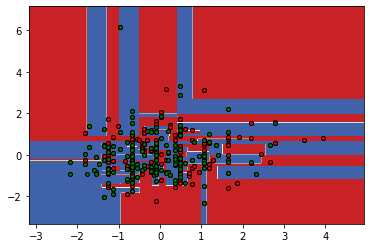

In [64]:
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
        # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=y_train[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

[Text(181.69024390243902, 201.90857142857143, 'X[1] <= -0.11\nentropy = 0.487\nsamples = 243\nvalue = [102, 141]\nclass = cholesterol'),
 Text(73.49268292682927, 170.84571428571428, 'X[1] <= -1.394\nentropy = 0.421\nsamples = 113\nvalue = [34, 79]\nclass = cholesterol'),
 Text(40.829268292682926, 139.78285714285715, 'X[1] <= -1.51\nentropy = 0.346\nsamples = 9\nvalue = [7, 2]\nclass = blood pressure'),
 Text(32.66341463414634, 108.72, 'X[1] <= -1.53\nentropy = 0.444\nsamples = 6\nvalue = [4, 2]\nclass = blood pressure'),
 Text(24.49756097560976, 77.65714285714284, 'X[1] <= -1.666\nentropy = 0.32\nsamples = 5\nvalue = [4, 1]\nclass = blood pressure'),
 Text(16.33170731707317, 46.59428571428572, 'X[1] <= -1.987\nentropy = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = blood pressure'),
 Text(8.165853658536586, 15.531428571428563, '\n  (...)  \n'),
 Text(24.49756097560976, 15.531428571428563, '\n  (...)  \n'),
 Text(32.66341463414634, 46.59428571428572, 'entropy = 0.0\nsamples = 3\nvalue = [3,

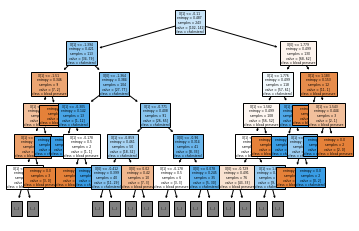

In [65]:
tree.plot_tree(classifier.fit(X_test,y_test),max_depth=5,class_names=('blood pressure','cholesterol'),fontsize=3,filled=True)

In [66]:
#Visualization
import seaborn as sns

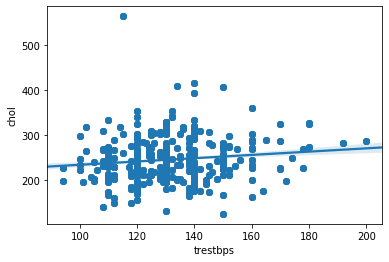

In [30]:
#scatter plot of blood pression vs. cholesterol

sns.regplot(heart_disease.trestbps,heart_disease.chol)

In [67]:
from matplotlib.colors import ListedColormap

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


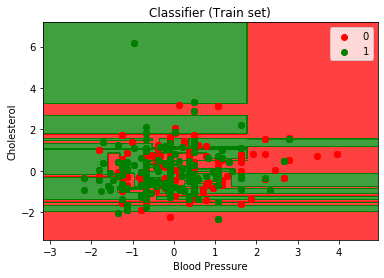

In [68]:
# train dataset
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classifier (Train set)')
plt.xlabel('Blood Pressure')
plt.ylabel('Cholesterol')
plt.legend()
plt.show()
                     

The green dots are the true observed data point and the red dots are the false observed data point
The green area is the predicted true area and the red area is the predicted false area

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


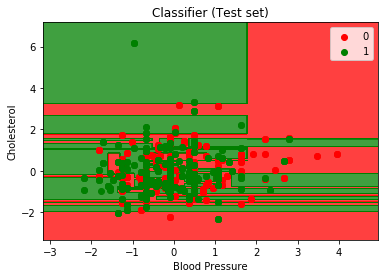

In [69]:
# test dataset
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classifier (Test set)')
plt.xlabel('Blood Pressure')
plt.ylabel('Cholesterol')
plt.legend()
plt.show()
                     

The green dots are the true observed data point and the red dots are the false observed data point
The green area is the predicted true area and the red area is the predicted false area

The results is to determine base two explanatory variable: blood pressure and cholesterol. There were 234 correct predictions and 9 incorrect predictions and an accuracy of 0.9629629629629629
